<a href="https://www.kaggle.com/code/esraanafaa/cv1-cats-vs-dogs?scriptVersionId=128542333" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
os.listdir('../input/dogs-vs-cats-redux-kernels-edition')

['sample_submission.csv', 'train.zip', 'test.zip']

In [2]:
print(os.listdir('../working'))  #current working folder or directory

['__notebook__.ipynb']


**Unzipping training file**

In [3]:
import zipfile

zip_files = ['test', 'train']

for zip_file in zip_files:
    with zipfile.ZipFile("../input/dogs-vs-cats-redux-kernels-edition/{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))
        

test unzipped
train unzipped


In [4]:
print(os.listdir('../working'))  #current working folder or directory

['test', '__notebook__.ipynb', 'train']


In [5]:
Train_Folder_Path = "../working/train"
Test_Folder_Path = "../working/test"
train_file_names = os.listdir(Train_Folder_Path)
test_file_names = os.listdir(Test_Folder_Path)
train_file_names[0:7]

['dog.7991.jpg',
 'dog.5320.jpg',
 'dog.6321.jpg',
 'cat.2318.jpg',
 'cat.8471.jpg',
 'cat.1925.jpg',
 'cat.1938.jpg']

test file

In [6]:
test_data = os.listdir(Test_Folder_Path)
test_data

['5571.jpg',
 '7025.jpg',
 '3561.jpg',
 '2146.jpg',
 '6189.jpg',
 '8339.jpg',
 '5598.jpg',
 '2391.jpg',
 '10800.jpg',
 '2352.jpg',
 '10603.jpg',
 '11041.jpg',
 '8017.jpg',
 '4459.jpg',
 '453.jpg',
 '4239.jpg',
 '2010.jpg',
 '6137.jpg',
 '8978.jpg',
 '104.jpg',
 '6037.jpg',
 '9328.jpg',
 '6963.jpg',
 '9280.jpg',
 '4201.jpg',
 '2055.jpg',
 '4549.jpg',
 '4416.jpg',
 '2138.jpg',
 '4191.jpg',
 '1354.jpg',
 '4396.jpg',
 '7829.jpg',
 '2910.jpg',
 '11994.jpg',
 '9244.jpg',
 '9724.jpg',
 '2595.jpg',
 '5403.jpg',
 '9775.jpg',
 '9341.jpg',
 '11253.jpg',
 '11339.jpg',
 '8709.jpg',
 '1713.jpg',
 '9058.jpg',
 '7398.jpg',
 '7415.jpg',
 '10699.jpg',
 '9918.jpg',
 '5039.jpg',
 '3274.jpg',
 '3580.jpg',
 '5853.jpg',
 '4235.jpg',
 '2783.jpg',
 '7678.jpg',
 '2689.jpg',
 '12111.jpg',
 '6050.jpg',
 '11577.jpg',
 '6298.jpg',
 '8904.jpg',
 '9872.jpg',
 '10471.jpg',
 '9689.jpg',
 '5742.jpg',
 '1348.jpg',
 '11194.jpg',
 '8190.jpg',
 '9822.jpg',
 '7423.jpg',
 '9955.jpg',
 '10953.jpg',
 '11106.jpg',
 '3324.jpg',
 

In [7]:
test_label = []
a = os.listdir("../working/test")
for i in range(len(a)):
    test_label.append(a[i].split(".")[0])
test_label[0:5]

['5571', '7025', '3561', '2146', '6189']

In [8]:
targets = []
full_paths = []
for file_name in train_file_names:
    target = file_name.split(".")[0]
    full_path = os.path.join(Train_Folder_Path, file_name)
    full_paths.append(full_path)
    targets.append(target)

train_df = pd.DataFrame()
train_df['image_path'] = full_paths
train_df['target'] = targets

In [9]:
train_df.head()

,image_path,target
0,../working/train/dog.7991.jpg,dog
1,../working/train/dog.5320.jpg,dog
2,../working/train/dog.6321.jpg,dog
3,../working/train/cat.2318.jpg,cat
4,../working/train/cat.8471.jpg,cat


In [10]:
full_paths = []
for file_name in test_file_names:
    target = file_name.split(".")[0]
    full_path = os.path.join(Test_Folder_Path, file_name)
    full_paths.append(full_path)

test_df = pd.DataFrame()
test_df['image_path'] = full_paths

In [11]:
test_df.head()

,image_path
0,../working/test/5571.jpg
1,../working/test/7025.jpg
2,../working/test/3561.jpg
3,../working/test/2146.jpg
4,../working/test/6189.jpg


In [12]:
train_data,val_data = train_test_split(train_df,random_state=234)

**Showing Images**

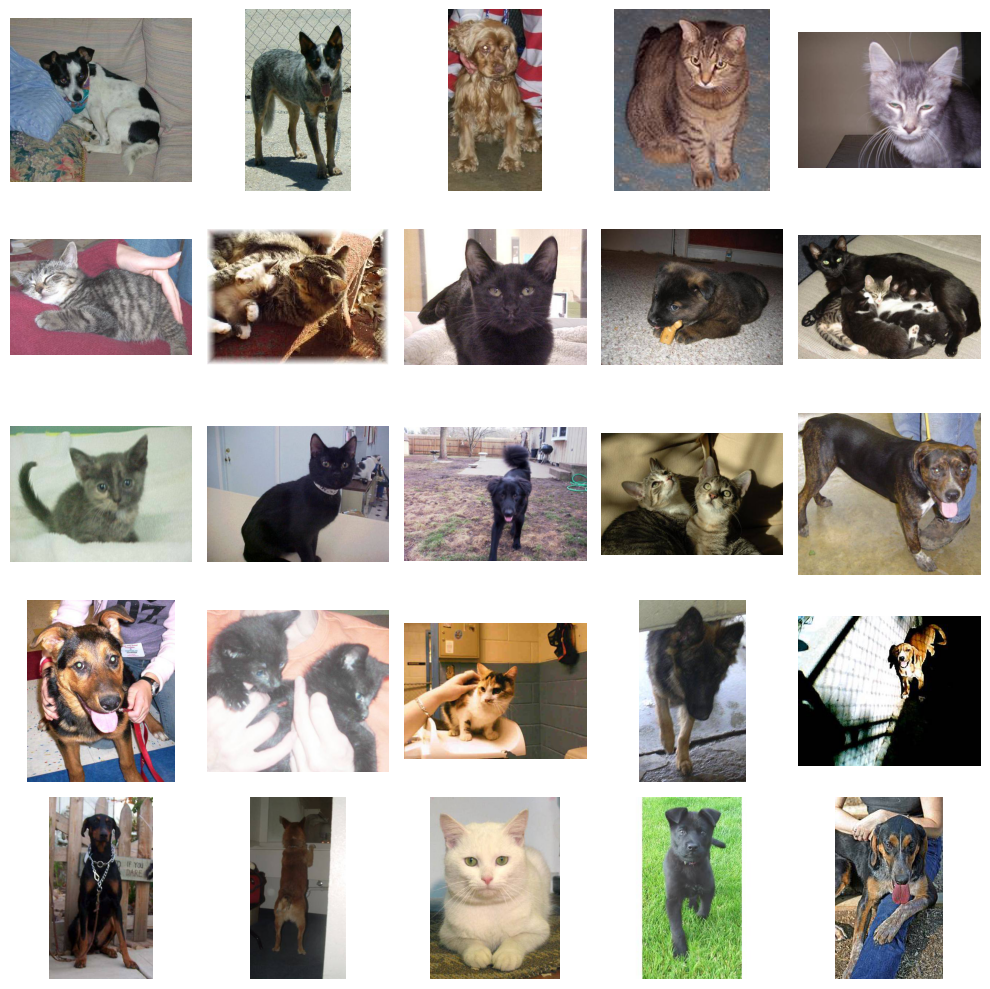

In [13]:
fig,axes=plt.subplots(5,5,figsize=(10,10))
axes = axes.ravel()
for i in range(25):
    axes[i].imshow(img.imread(train_df.iloc[i,0]))
    axes[i].axis('off')
fig.tight_layout()
plt.show()

# When there is little data to train, we have to use ImageDataGenerator to increase the number of data
1. rescale = 1./255 : change the value between 0 and 1<br>rotation_range = 15 : Random rotation within 15 degrees<br>shear_range = 0.1 : shear range 10% <br>
4. zoom_range = 0.18 : zoom range 18%

5. horizontal_flip = True : Randomly flip horizontally.

6. width_shift_range = 0.1 : Randomly move the original image horizontally within 10% of the width<br>height_shift_range=0.1 : Randomly move the original image vertically within 10% of the width</span>

In [14]:
train_datagen = ImageDataGenerator(zoom_range=.18,rotation_range=10,rescale=1./255,shear_range=0.1,
                            horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)
train_data_generator = train_datagen.flow_from_dataframe(dataframe=train_data,x_col='image_path',y_col='target',
                                                  target_size=(150,150),class_mode='binary',batch_size=150,shuffle=False)

Found 18750 validated image filenames belonging to 2 classes.


In [15]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_data_generator = val_datagen.flow_from_dataframe(dataframe=val_data,x_col='image_path',y_col='target',
                                                  target_size=(150,150),class_mode='binary',batch_size=150,shuffle=False)

Found 6250 validated image filenames belonging to 2 classes.


In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data_generator = test_datagen.flow_from_dataframe(dataframe=test_df,x_col='image_path',y_col=None,
                                                  target_size=(150,150),class_mode=None,batch_size=150,shuffle=False)

Found 12500 validated image filenames.


In [17]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

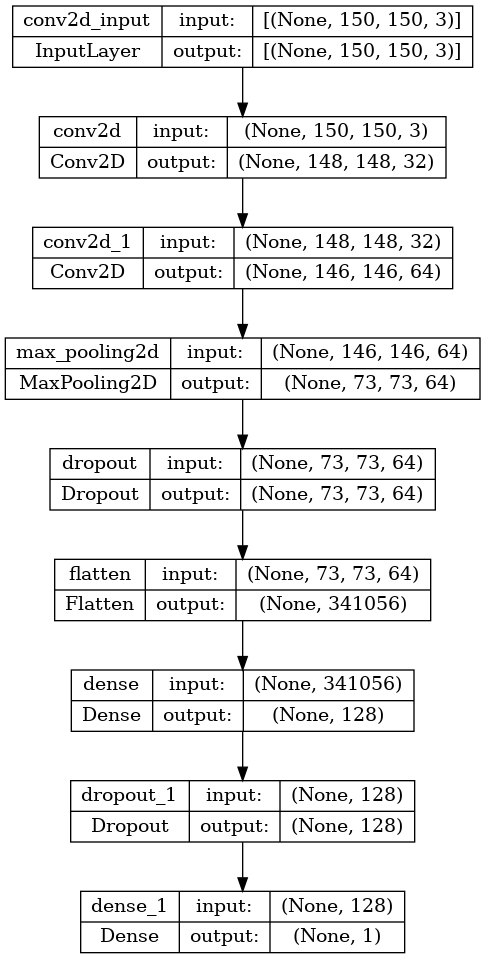

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.8/989.8 kB 13.8 MB/s eta 0:00:00


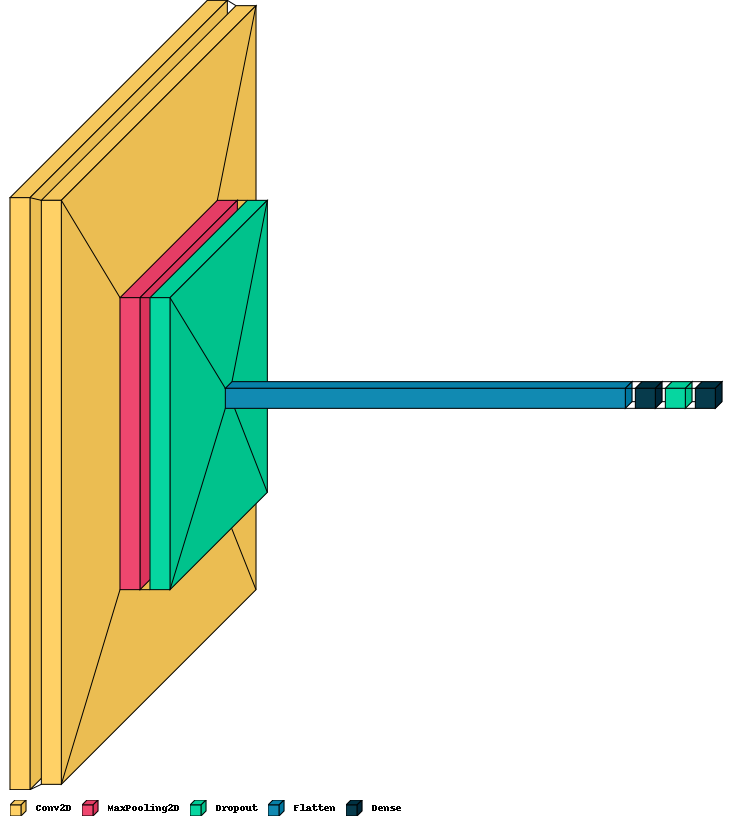

In [19]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model,legend=True)

In [20]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 flatten (Flatten)           (None, 341056)            0         
                                                                 
 dense (Dense)               (None, 128)               43655296  
                                                        

**Fitting the Model**

In [21]:
hist = model.fit(train_data_generator,epochs=12,validation_data=val_data_generator,
                 validation_steps=val_data.shape[0]/150,
                 steps_per_epoch=train_data.shape[0]/150,
                 verbose=1)

Epoch 1/12


2023-05-06 14:31:37.530053: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


125/125 [==============================] - 173s 1s/step - loss: 1.2798 - accuracy: 0.5043 - val_loss: 0.6933 - val_accuracy: 0.4885
Epoch 2/12
125/125 [==============================] - 160s 1s/step - loss: 0.6931 - accuracy: 0.5038 - val_loss: 0.6933 - val_accuracy: 0.4885
Epoch 3/12
125/125 [==============================] - 159s 1s/step - loss: 0.6931 - accuracy: 0.5038 - val_loss: 0.6933 - val_accuracy: 0.4885
Epoch 4/12
125/125 [==============================] - 159s 1s/step - loss: 0.6931 - accuracy: 0.5038 - val_loss: 0.6934 - val_accuracy: 0.4885
Epoch 5/12
125/125 [==============================] - 159s 1s/step - loss: 0.6931 - accuracy: 0.5038 - val_loss: 0.6934 - val_accuracy: 0.4885
Epoch 6/12
125/125 [==============================] - 160s 1s/step - loss: 0.6931 - accuracy: 0.5038 - val_loss: 0.6933 - val_accuracy: 0.4885
Epoch 7/12
125/125 [==============================] - 163s 1s/step - loss: 0.6931 - accuracy: 0.5038 - val_loss: 0.6934 - val_accuracy: 0.4885
Epoch 8/12

**Model Performance**

In [22]:
score=model.evaluate(val_data_generator)
print(score[1])

42/42 [==============================] - 20s 464ms/step - loss: 0.6934 - accuracy: 0.4885
0.48848000168800354


**Plotting Accuracy**

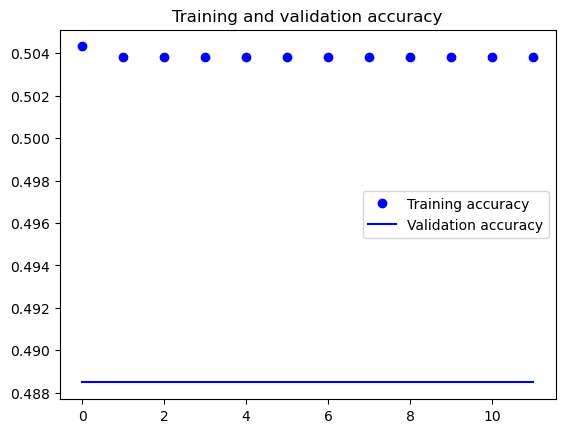

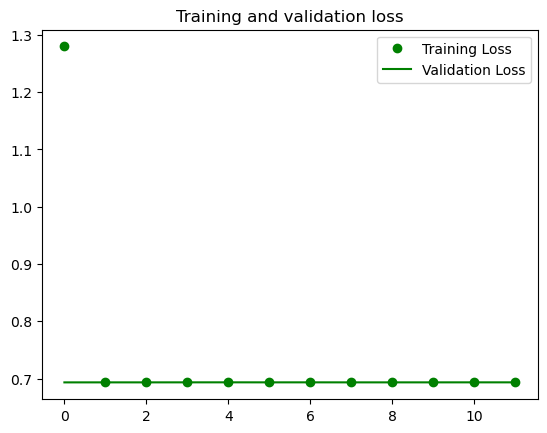

In [23]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Feeding our model with test data to predict**

In [24]:
predictions = model.predict(test_data_generator)

84/84 [==============================] - 39s 458ms/step


In [25]:
predictions = np.round(predictions.flatten()).astype(int)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [26]:
np.size(predictions)

12500

In [27]:
submission = pd.DataFrame({'id':test_label,'label':predictions})
submission.to_csv("submission.csv",index=False)

In [28]:
df = pd.read_csv('/kaggle/working/submission.csv')
df.head()

,id,label
0,5571,1
1,7025,1
2,3561,1
3,2146,1
4,6189,1
